In [215]:
import pandas as pd
from utils import MysqlConnector
conn = MysqlConnector()

In [216]:
pd.set_option('display.max_rows', None)

1. Gráfico do volume de vendas por cliente – lista dos maiores clientes - Top 10

In [217]:
result = conn.fetch('''
SELECT
    c.customer_name,
    SUM(o.order_amount) AS total
FROM
    customer_dim c
INNER JOIN sales_order_fact o ON
    c.customer_sk = o.customer_sk
GROUP BY
    c.customer_name
ORDER BY
    total DESC
LIMIT 10
''')

In [218]:
df = pd.DataFrame(result, columns=['Nome do cliente', 'Total vendido'])
df.set_index('Nome do cliente', inplace=True)
df['Total vendido'] = df['Total vendido'].astype(float)
df

,Total vendido
Nome do cliente,
Iron Mount,143220.0
Medium Retailers,129400.0
Small Stores,115320.0
Good Companies,106970.0
Wonderful Shops,93000.0
Ticanos Com,80000.0
Big Customers,75400.0
Mex Free,53400.0
Good Products,46000.0


<Axes: xlabel='Nome do cliente'>

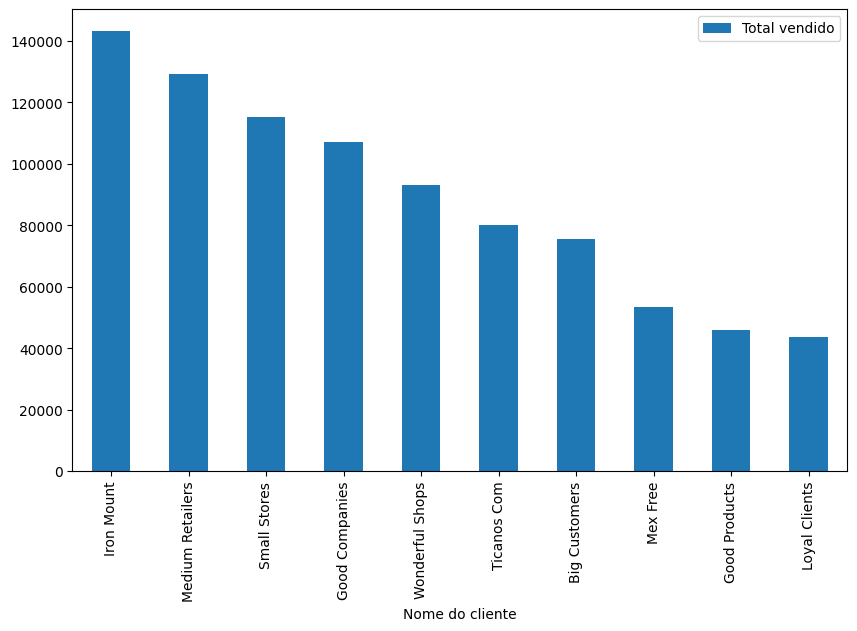

In [219]:
df.plot(kind='bar', figsize=(10, 6), rot=90)

2. Gráfico dos valores de pedidos, agrupados por produtos vendidos.

In [220]:
result = conn.fetch('''
SELECT
    p.product_name,
    SUM(o.order_amount) AS total
FROM
    sales_order_fact o
INNER JOIN product_dim p ON
    o.product_sk = p.product_sk
GROUP BY
    p.product_name
ORDER BY
    total DESC
''')

In [221]:
df = pd.DataFrame(result, columns=['Nome do produto', 'Total vendido'])
df.set_index('Nome do produto', inplace=True)
df['Total vendido'] = df['Total vendido'].astype(float)
df

,Total vendido
Nome do produto,
Pen Drive,294400.0
Mouse,189150.0
Keyboard,149500.0
Batery,131600.0
Pocket Storage,105200.0
LCD Panel,101600.0
Ink Print,83500.0
Microphone,48500.0
External Cam,48340.0


<Axes: xlabel='Nome do produto'>

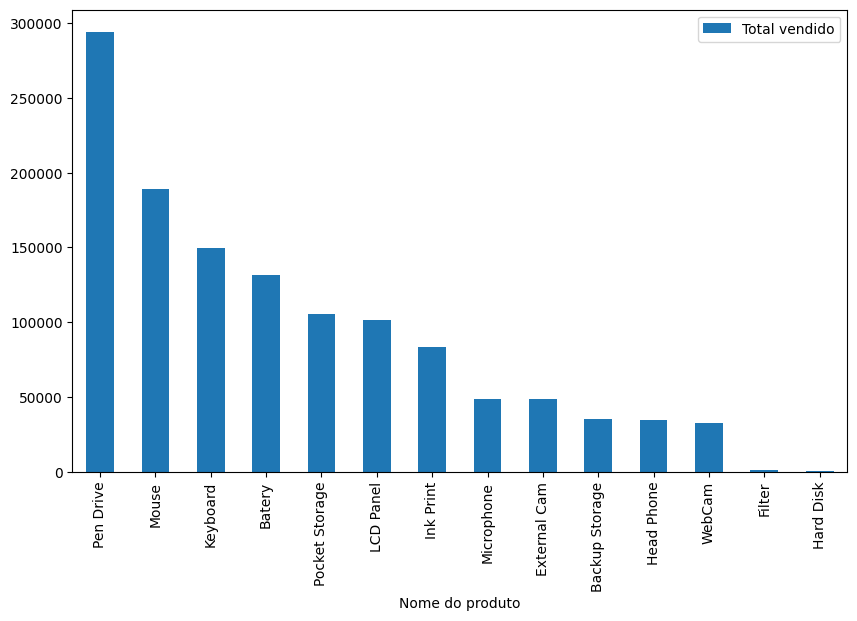

In [222]:
df.plot(kind='bar', figsize=(10, 6), rot=90)

3. Gráfico da soma dos valores de pedidos, verificando as dimensões de data e ordens.

In [223]:
result = conn.fetch('''
SELECT
    d.date,
    SUM(o.order_amount) AS total
FROM
    sales_order_fact o
INNER JOIN date_dim d ON
    o.order_date_sk = d.date_sk
GROUP BY
    d.date
ORDER BY
    d.date ASC;
''')

In [224]:
df = pd.DataFrame(result, columns=['Data', 'Total vendido'])
df.set_index('Data', inplace=True)
df['Total vendido'] = df['Total vendido'].astype(float)
df

,Total vendido
Data,
2005-01-31,4000.0
2005-02-28,2000.0
2005-03-31,4000.0
2005-04-30,4000.0
2005-05-31,12000.0
2005-06-30,13000.0
2005-07-31,16000.0
2005-08-31,8000.0
2005-09-30,30000.0


<Axes: xlabel='Data'>

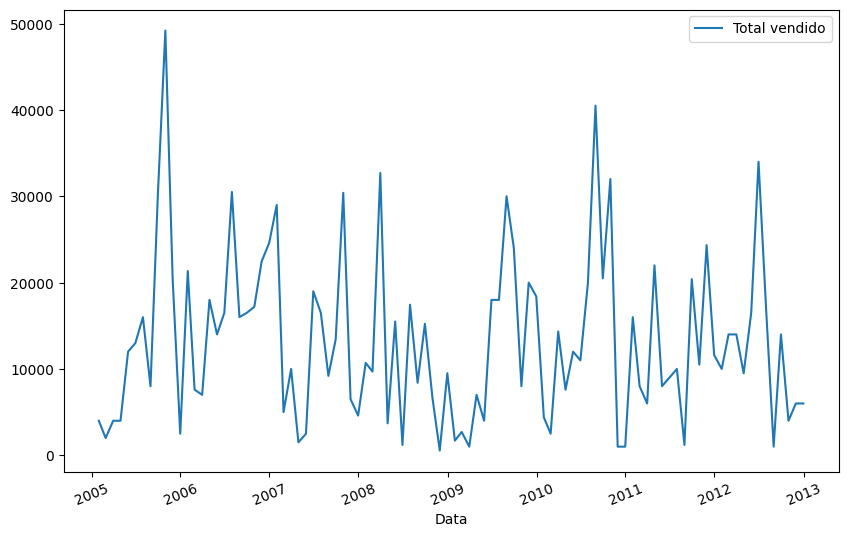

In [225]:
df.plot(kind='line', figsize=(10, 6), rot=22)

Gráfico das maiores vendas do ano, agrupados por mês.

In [226]:
result = conn.fetch('''
SELECT
    d.year,
    d.month,
    SUM(o.order_amount) AS total
FROM
    sales_order_fact o
INNER JOIN date_dim d ON
    o.order_date_sk = d.date_sk
GROUP BY
    d.year,
    d.month
ORDER BY
    total desc;
''')

In [227]:
df = pd.DataFrame(result, columns=['Ano', 'Mês', 'Total vendido'])
df['Data'] = df[['Mês', 'Ano']].astype(str).apply(lambda x: '/'.join(x), axis=1)
df.set_index('Data', inplace=True)
df['Total vendido'] = df['Total vendido'].astype(float)
df

,Ano,Mês,Total vendido
Data,,,
10/2005,2005,10,49200.0
8/2010,2010,8,40500.0
6/2012,2012,6,34000.0
3/2008,2008,3,32700.0
10/2010,2010,10,32000.0
7/2006,2006,7,30500.0
10/2007,2007,10,30400.0
8/2009,2009,8,30000.0
9/2005,2005,9,30000.0


<Axes: xlabel='Data'>

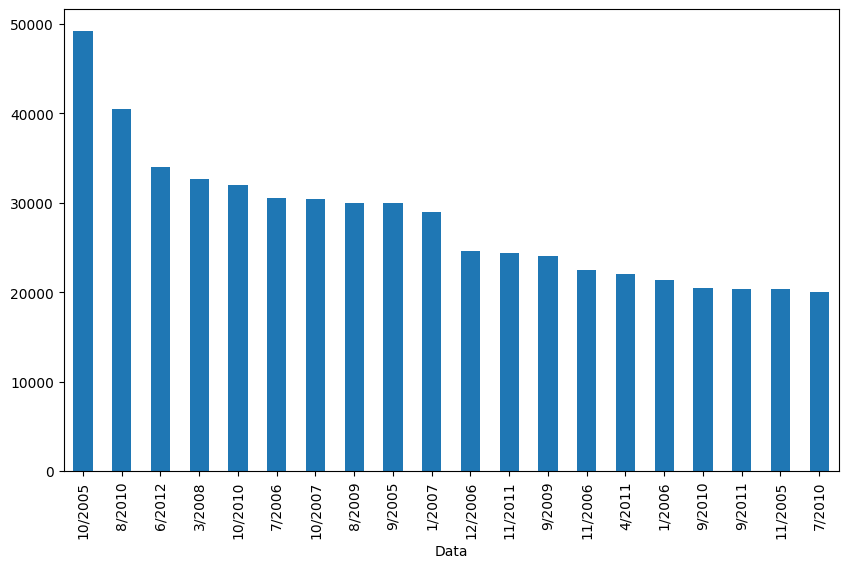

In [228]:
df['Total vendido'].iloc[:20].plot(kind='bar', figsize=(10, 6), rot=90)

Gráfico das maiores vendas no ano, agrupados por mês e clientes;

In [229]:
result = conn.fetch('''
SELECT
    d.year,
    d.month,
    c.customer_name,
    SUM(o.order_amount) AS total
FROM
    sales_order_fact o
INNER JOIN date_dim d ON
    o.order_date_sk = d.date_sk
INNER JOIN customer_dim c ON
    o.customer_sk = c.customer_sk
GROUP BY
    d.year,
    d.month,
    c.customer_sk
ORDER BY
    total desc;
''')

In [230]:
df = pd.DataFrame(result, columns=['Ano', 'Mês', 'Cliente', 'Total vendido'])
df['Data'] = df[['Mês', 'Ano', 'Cliente']].astype(str).apply(lambda x: f'{x[0]}/{x[1]} ({x[2]})', axis=1)
df.set_index('Data', inplace=True)
df['Total vendido'] = df['Total vendido'].astype(float)
df

,Ano,Mês,Cliente,Total vendido
Data,,,,
10/2007 (Medium Retailers),2007,10,Medium Retailers,26400.0
1/2007 (Wonderful Shops),2007,1,Wonderful Shops,21000.0
12/2006 (Medium Retailers),2006,12,Medium Retailers,20600.0
9/2005 (Good Companies),2005,9,Good Companies,20000.0
3/2008 (Good Companies),2008,3,Good Companies,20000.0
7/2007 (Big Customers),2007,7,Big Customers,16500.0
8/2006 (Iron Mount),2006,8,Iron Mount,16000.0
10/2010 (Iron Mount),2010,10,Iron Mount,16000.0
6/2012 (Iron Mount),2012,6,Iron Mount,16000.0


<Axes: xlabel='Data'>

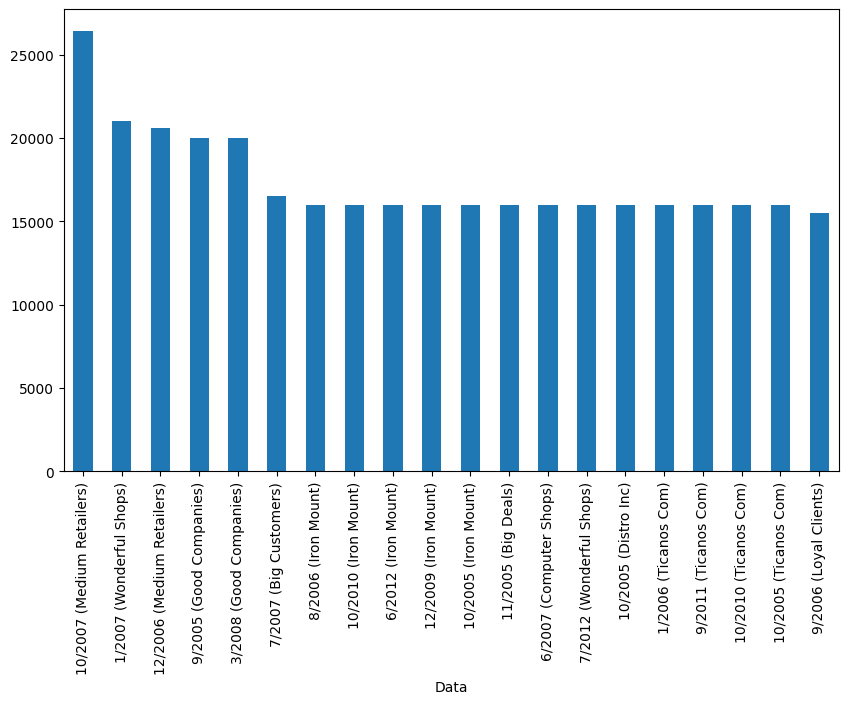

In [231]:
df['Total vendido'].iloc[:20].plot(kind='bar', figsize=(10, 6), rot=90)

Gráfico anual de vendas, contendo os produtos, valores dos pedidos,
agregados pelo ano, produto e cidade do cliente.

In [232]:
result = conn.fetch('''
SELECT
    d.year,
    p.product_name,
    SUM(o.order_amount) AS total
FROM
    sales_order_fact o
INNER JOIN date_dim d ON
    o.order_date_sk = d.date_sk
INNER JOIN product_dim p ON
    o.product_sk = p.product_sk
GROUP BY
    d.year,
    p.product_sk
ORDER BY
    total desc;
''')

In [233]:
df = pd.DataFrame(result, columns=['Ano', 'Produto', 'Total vendido'])
df['Produto (Ano)'] = df[['Produto', 'Ano']].astype(str).apply(lambda x: f'{x[0]} ({x[1]})', axis=1)
df.set_index('Produto (Ano)', inplace=True)
df['Total vendido'] = df['Total vendido'].astype(float)
df

,Ano,Produto,Total vendido
Produto (Ano),,,
Pen Drive (2005),2005,Pen Drive,55200.0
Pen Drive (2011),2011,Pen Drive,48800.0
Mouse (2005),2005,Mouse,46400.0
Pen Drive (2006),2006,Pen Drive,45200.0
Pen Drive (2009),2009,Pen Drive,41200.0
Keyboard (2006),2006,Keyboard,40280.0
Batery (2007),2007,Batery,40100.0
Pocket Storage (2005),2005,Pocket Storage,35000.0
Keyboard (2010),2010,Keyboard,34500.0


<Axes: xlabel='Produto (Ano)'>

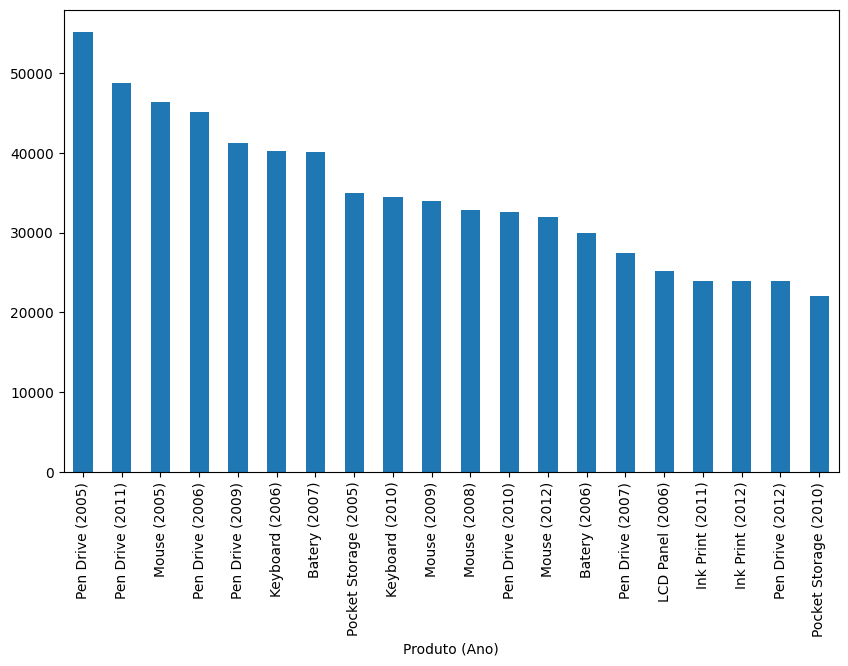

In [234]:
df['Total vendido'].iloc[:20].plot(kind='bar', figsize=(10, 6), rot=90)

In [235]:
result = conn.fetch('''
SELECT
    d.year,
    c.customer_city,
    SUM(o.order_amount) AS total
FROM
    sales_order_fact o
INNER JOIN date_dim d ON
    o.order_date_sk = d.date_sk
INNER JOIN customer_dim c ON
    o.customer_sk = c.customer_sk
GROUP BY
    d.year,
    c.customer_city
ORDER BY
    total desc;
''')

In [236]:
df = pd.DataFrame(result, columns=['Ano', 'Cidade', 'Total vendido'])
df['Cidade (Ano)'] = df[['Cidade', 'Ano']].astype(str).apply(lambda x: f'{x[0]} ({x[1]})', axis=1)
df.set_index('Cidade (Ano)', inplace=True)
df['Total vendido'] = df['Total vendido'].astype(float)
df

,Ano,Cidade,Total vendido
Cidade (Ano),,,
Pittsburgh (2006),2006,Pittsburgh,106240.0
Mechanicsburg (2005),2005,Mechanicsburg,79000.0
Pittsburgh (2010),2010,Pittsburgh,71400.0
Mechanicsburg (2007),2007,Mechanicsburg,70800.0
Mechanicsburg (2009),2009,Mechanicsburg,59000.0
Mechanicsburg (2008),2008,Mechanicsburg,58570.0
Pittsburgh (2012),2012,Pittsburgh,53500.0
Pittsburgh (2007),2007,Pittsburgh,53340.0
Pittsburgh (2008),2008,Pittsburgh,52290.0


<Axes: xlabel='Cidade (Ano)'>

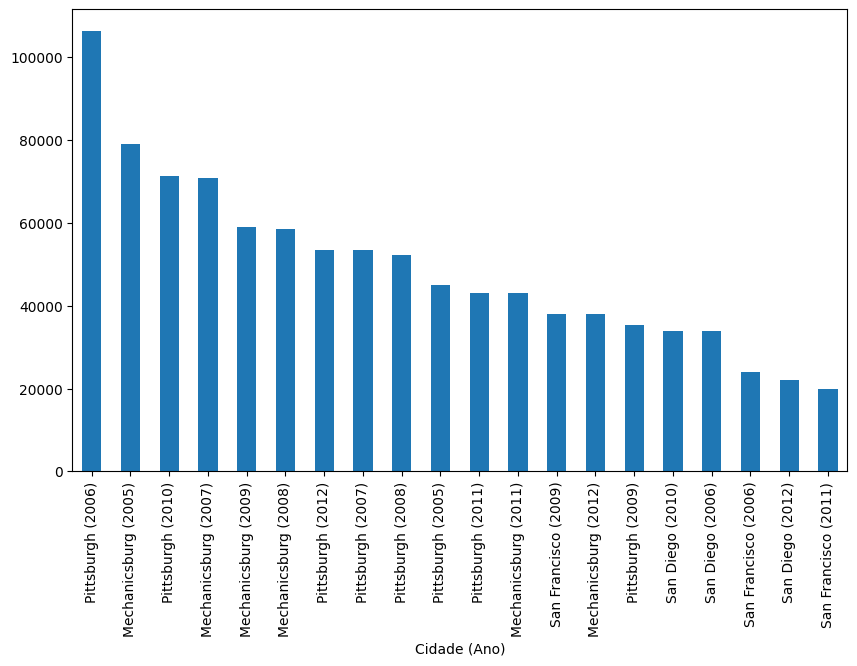

In [237]:
df['Total vendido'].iloc[:20].plot(kind='bar', figsize=(10, 6), rot=90)

Gráfico anual de vendas, contendo as quantidades dos pedidos,
agregados por ano.

In [238]:
result = conn.fetch('''
SELECT
    d.year,
    SUM(o.order_amount) AS total
FROM
    sales_order_fact o
INNER JOIN date_dim d ON
    o.order_date_sk = d.date_sk
GROUP BY
    d.year
ORDER BY
    total desc;
''')

In [239]:
df = pd.DataFrame(result, columns=['Ano', 'Total vendido'])
df.set_index('Ano', inplace=True)
df['Total vendido'] = df['Total vendido'].astype(float)
df

,Total vendido
Ano,
2006,211680.0
2010,166840.0
2005,165100.0
2009,152800.0
2007,147640.0
2012,146000.0
2011,138040.0
2008,131260.0


<Axes: xlabel='Ano'>

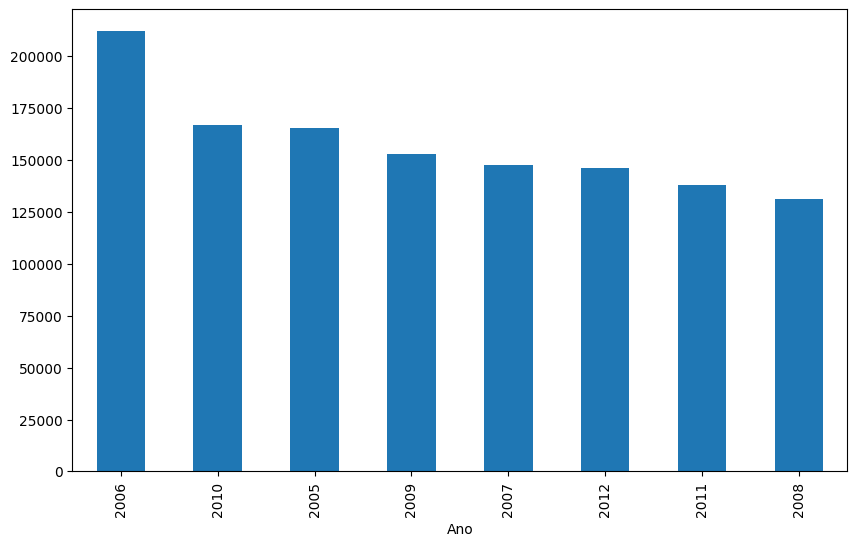

In [240]:
df['Total vendido'].plot(kind='bar', figsize=(10, 6), rot=90)

Gráfico do resumo das vendas mensais e o número de encomendas a
cada mês, cuja categoria seja PERIPHERAL.

In [241]:
result = conn.fetch('''
SELECT
    d.year,
    d.month,
    SUM(o.order_amount) AS total
FROM
    sales_order_fact o
INNER JOIN date_dim d ON
    o.order_date_sk = d.date_sk
INNER JOIN product_dim p ON
    o.product_sk = p.product_sk
WHERE p.product_category = 'PERIPHERAL'
GROUP BY
    d.year,
    d.month
ORDER BY
    year asc, month asc;
''')

In [242]:
df = pd.DataFrame(result, columns=['Ano', 'Mês', 'Total vendido'])
df['Data'] = df[['Mês', 'Ano']].astype(str).apply(lambda x: '/'.join(x), axis=1)
df.set_index('Data', inplace=True)
df['Total vendido'] = df['Total vendido'].astype(float)
df

,Ano,Mês,Total vendido
Data,,,
3/2005,2005,3,4000.0
5/2005,2005,5,12000.0
6/2005,2005,6,6000.0
9/2005,2005,9,30000.0
11/2005,2005,11,4400.0
12/2005,2005,12,2500.0
1/2006,2006,1,20340.0
3/2006,2006,3,6000.0
4/2006,2006,4,11000.0


<Axes: xlabel='Data'>

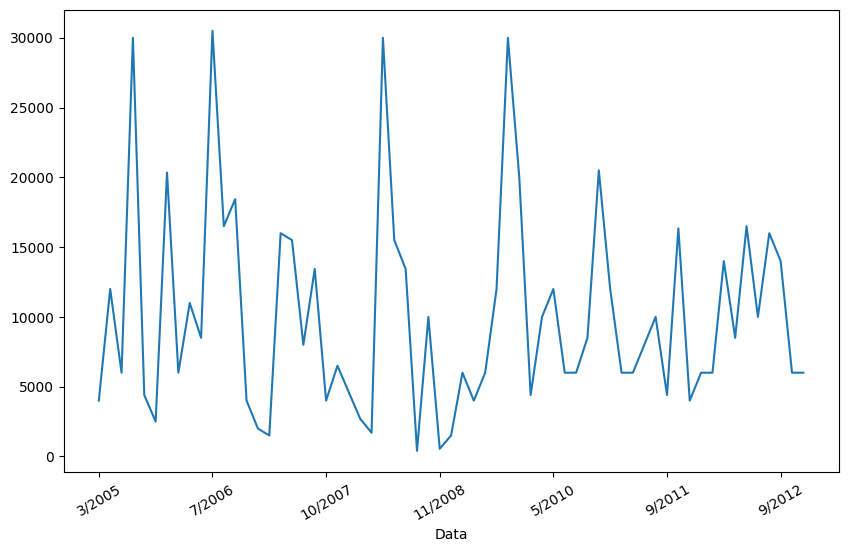

In [243]:
df['Total vendido'].plot(kind='line', figsize=(10, 6), rot=30)

Gráfico das ordens de venda de produtos com valores mensais maiores
que 35 mil.

In [244]:
result = conn.fetch('''
SELECT
    d.year,
    d.month,
    SUM(o.order_amount) AS total
FROM
    sales_order_fact o
INNER JOIN date_dim d ON
    o.order_date_sk = d.date_sk
GROUP BY
    d.year,
    d.month
HAVING total > 35000
ORDER BY
    year asc, month asc;
''')

In [245]:
df = pd.DataFrame(result, columns=['Ano', 'Mês', 'Total vendido'])
df['Data'] = df[['Mês', 'Ano']].astype(str).apply(lambda x: '/'.join(x), axis=1)
df.set_index('Data', inplace=True)
df['Total vendido'] = df['Total vendido'].astype(float)
df

,Ano,Mês,Total vendido
Data,,,
10/2005,2005,10,49200.0
8/2010,2010,8,40500.0


<Axes: xlabel='Data'>

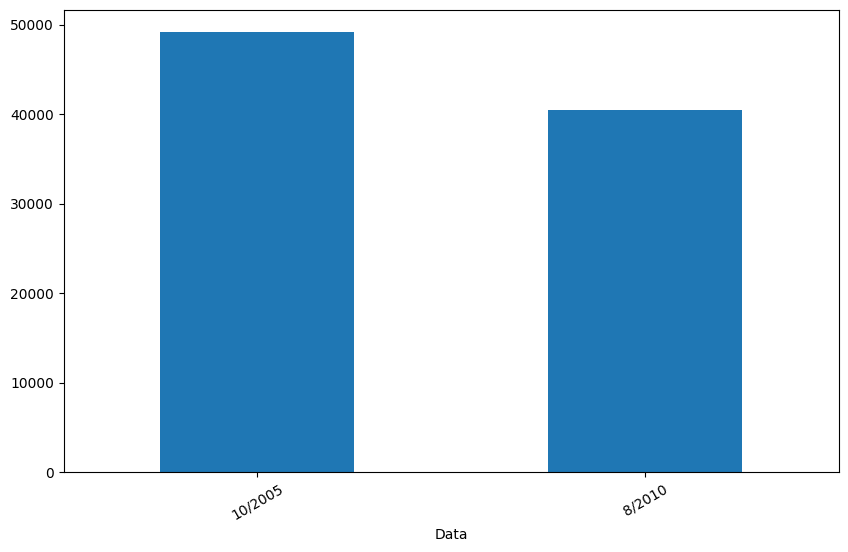

In [246]:
df['Total vendido'].iloc[:20].plot(kind='bar', figsize=(10, 6), rot=30)

Gráfico das cidades que mais gastaram nos últimos anos.

In [247]:
result = conn.fetch('''
SELECT
    c.customer_city,
    SUM(o.order_amount) AS total
FROM
    sales_order_fact o
INNER JOIN customer_dim c ON
    o.customer_sk = c.customer_sk
GROUP BY
    c.customer_city
ORDER BY
    total desc;
''')

In [248]:
df = pd.DataFrame(result, columns=['Cidade', 'Total vendido'])
df.set_index('Cidade', inplace=True)
df['Total vendido'] = df['Total vendido'].astype(float)
df

,Total vendido
Cidade,
Pittsburgh,460370.0
Mechanicsburg,376370.0
San Diego,143220.0
San Francisco,104000.0
Mechaniscburg,80000.0
Texas,57400.0
Los Angeles,30000.0
California,8000.0


<Axes: xlabel='Cidade'>

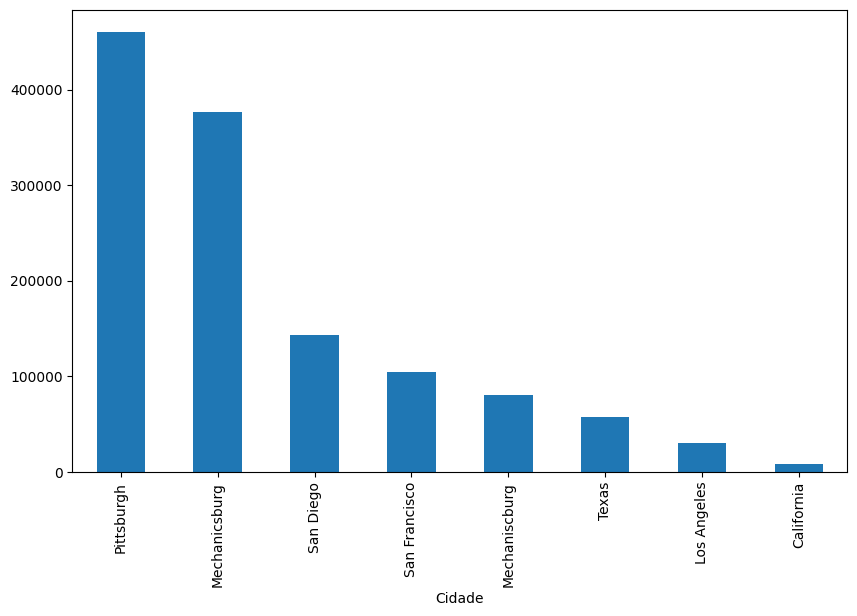

In [249]:
df['Total vendido'].plot(kind='bar', figsize=(10, 6), rot=90)